# LAB 2 : Data Preprocessing and cleaning 

## 4.1 Data Quality Issues

Poor data quality can have an adverse effect on data mining. Among the common data quality issues include noise, outliers, missing values, and duplicate data.

### 4.1.1 Handling Missing Values

According to the description of the dataset, the missing values are encoded as '?' in the original data. Our first task is to convert the missing values to NaNs.

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None, 
                   na_values='?') # replace ? with NaN 
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class'] # re-naming the features from indexes (0-10) to names
data = data.drop(['Sample code'],axis=1)# fixme
print('Number of instances = %d' % data.shape[0])# fixme
print('Number of attributes = %d' % data.shape[1])# fixme
data.head()

print('Number of missing values:')
for col in data.columns:
    print(f"{col}: {data[col].isna().sum()}")# fixme

Number of instances = 699
Number of attributes = 10
Number of missing values:
Clump Thickness: 0
Uniformity of Cell Size: 0
Uniformity of Cell Shape: 0
Marginal Adhesion: 0
Single Epithelial Cell Size: 0
Bare Nuclei: 16
Bland Chromatin: 0
Normal Nucleoli: 0
Mitoses: 0
Class: 0


The missing values in the 'Bare Nuclei' column are replaced by the median value of that column.

In [ ]:
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median()) # fixme

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20    10.0
21     7.0
22     1.0
23     NaN
24     1.0
Name: Bare Nuclei, dtype: float64

After replacing missing values:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


another approach is to discard the data points that contain missing values. 

In [ ]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()  # fixme

print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


### 4.1.2 Outliers

Outliers are data instances with characteristics that are considerably different from the rest of the dataset. In the example code below, we will draw a boxplot to identify the columns in the table that contain outliers. Note that the values in all columns (except for 'Bare Nuclei') are originally stored as 'int64' whereas the values in the 'Bare Nuclei' column are stored as string objects (since the column initially contains strings such as '?' for representing missing values). Thus, we must  convert the column into numeric values first before creating the boxplot. Otherwise, the column will not be displayed when drawing the boxplot.


<Axes: >

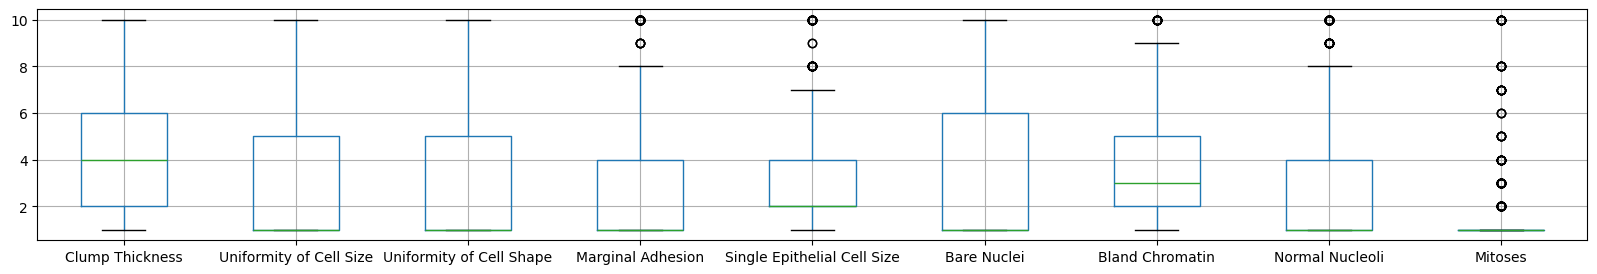

In [ ]:
import matplotlib.pyplot as plt

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'], errors='coerce') # # fixme ? errors='coerce' ensure any non-numeric values (eg, ?) are converted to NaN
data2.boxplot(figsize=(20,3))

The boxplots suggest that only 5 of the columns contain abnormally high values. To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3).

In [ ]:
Z = (data2-data2.mean())/data2.std() # standardizing (normalisation brk) the data, NaN are not affected by the standardization.
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


We perform a data filtering operation to the values either exceed Z > 3 or fall below Z <= -3, as criteria to identify examples that are far from the mean, assuming that the attributes follow a normal distribution.

In [13]:
print(f"Number of rows before discarding missing values = {Z.shape[0]}")
Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:] # loc[row, columns] , in the row, Z>-3 create a data frame of True, false replacing their privious values with these bool, and the sum we are summing only the rows where == 9 (#attributes) since True = 1 in python
print(f"Number of rows after discarding missing values = {Z2.shape[0]}")

Number of rows before discarding missing values = 699
Number of rows after discarding missing values = 632


### 4.1.3 Duplicate Data

In [ ]:
# the term deduplication is used, refers to dealing with duplicate issues
dups = data.duplicated() # # fixme returns a boolean Series where each value is True if that row is a duplicate of all previous.
print(f"Number of duplicate rows = {dups.sum()}") # .sum counts the True only (true = 1 in python)
data.loc[[11,28]] # not from 11 to 28 , only 11 and 28 we want to print them

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1.0,2,1,1,2
28,2,1,1,1,2,1.0,2,1,1,2


Although such duplicate rows may correspond to samples for different individuals, in this hypothetical example, we assume that the duplicates are samples taken from the same individual .

In [ ]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates() # fixme
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


## 4.2 Aggregation

Data aggregation is a preprocessing task where the values of two or more objects are combined into a single object. The motivation for aggregation includes (1) reducing the size of data to be processed, (2) changing the granularity of analysis (from fine-scale to coarser-scale), and (3) improving the stability of the data.

A time series is simply a sequence of data points collected over time, where the order of the data matters.

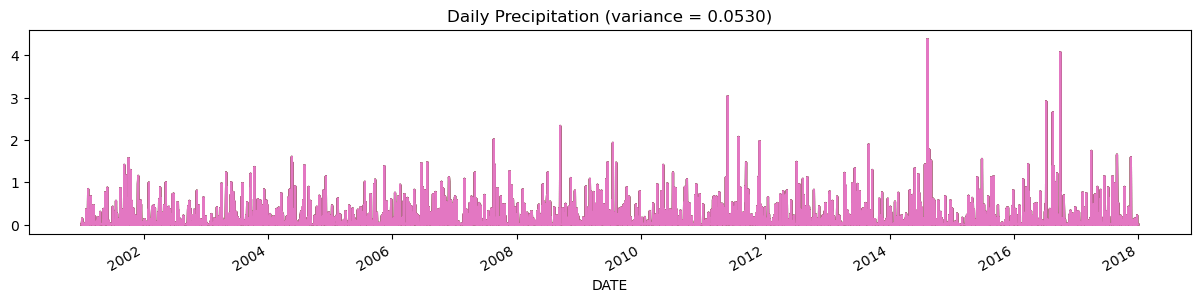

In [ ]:
import matplotlib.pyplot as plt
daily = pd.read_csv('DTW_prec.csv', header='infer') # means pandas will automatically use the first row as column headers
daily.index = pd.to_datetime(daily['DATE'])         # convert from string to DATE type, Then sets the DataFrame index to this datetime (since By default, pandas gives each row a number as index)
daily = daily['PRCP']                               # Now, daily is a pandas Series whose: index = date  , values = PRCP
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))
plt.show()

Observe that the daily time series appear to be quite chaotic and varies significantly from one time step to another. The time series can be grouped and aggregated by month to obtain the total monthly precipitation values. The resulting time series appears to vary more smoothly compared to the daily time series.

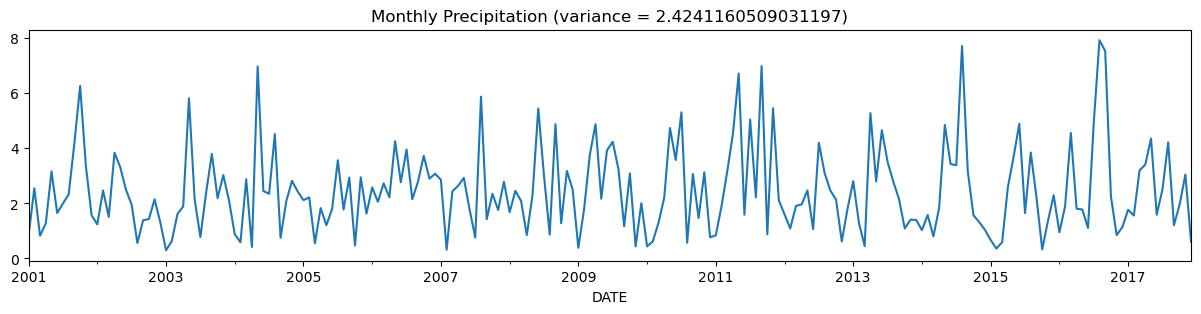

In [ ]:
monthly = daily.groupby(pd.Grouper(freq='ME')).sum() # # fixme Grouper: group the Series by a specific time frequency, based on its datetime index; ME (month end) labeling each group by the last date of that month.
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title(f'Monthly Precipitation (variance = {monthly.var()})')
plt.show()

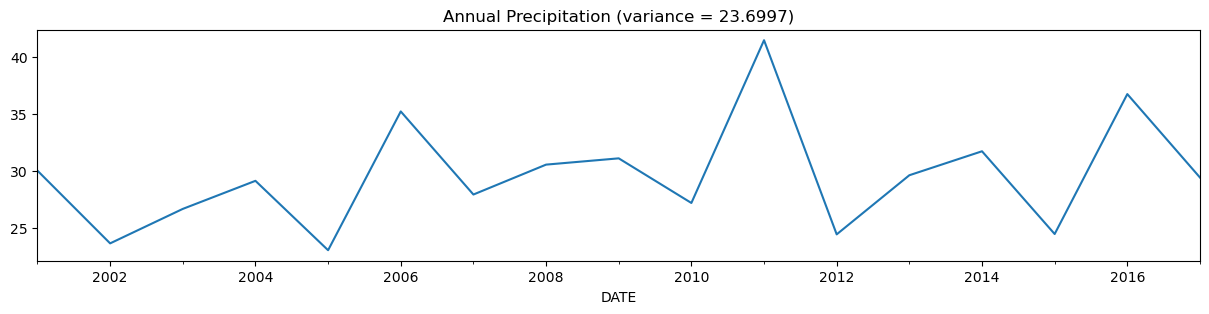

In [ ]:
annual = daily.groupby(pd.Grouper(freq='YE')).sum() # # fixme  group by annual
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))
plt.show()

## 4.3 Sampling

Sampling is an approach commonly used to facilitate (1) data reduction for exploratory data analysis and scaling up algorithms to big data applications and (2) quantifying uncertainties due to varying data distributions. There are various methods available for data sampling, such as sampling without replacement, where each selected instance is removed from the dataset, and sampling with replacement, where each selected instance is not removed, thus allowing it to be selected more than once in the sample.

In [ ]:
data.head() # we will apply sampling with replacement and without replacement to the breast cancer dataset

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
sample = data.sample(n=3) # random, without replacement
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
462,6,1,1,3,2,1.0,1,1,1,2
474,5,1,1,1,2,1.0,1,1,1,2
243,1,1,1,1,2,5.0,5,1,1,2


In [ ]:
sample = data.sample(frac=0.01, random_state=42) # # fixme  selecting 1% of the data (without replacement), the seed value of the random number generator,
sample # Using a fixed random_state value guarantees you get the same sample each time you run the code

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
158,1,1,2,1,3,NaN,1,1,1,2
499,4,1,1,1,2,1.0,2,1,1,2
396,3,1,1,1,2,1.0,3,1,1,2
155,5,5,5,6,3,10.0,3,1,1,4
321,3,1,1,1,2,NaN,3,1,1,2
212,1,1,1,1,2,1.0,3,1,1,2
234,3,3,2,1,3,1.0,3,6,1,2


In [ ]:
sample = data.sample(frac=0.01, random_state=42, replace=True) ## fixme  with replacement
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
102,4,1,2,1,2,1.0,3,1,1,2
435,10,8,10,1,3,10.0,5,1,1,4
270,8,4,7,1,3,10.0,3,9,2,4
106,10,10,10,8,2,10.0,4,1,1,4
71,6,10,2,8,10,2.0,7,8,10,4
20,7,3,2,10,5,10.0,5,4,4,4
614,2,1,1,1,1,1.0,2,1,1,2


## 4.4 Discretization

Discretization is a data preprocessing step that is often used to transform a continuous-valued attribute to a categorical attribute. The example below illustrates two simple but widely-used unsupervised discretization methods (equal width and equal depth) applied to the 'Clump Thickness' attribute of the breast cancer dataset.

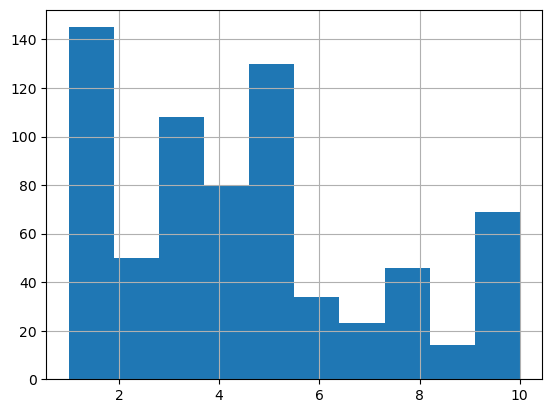

In [ ]:
data['Clump Thickness'].hist(bins=10) # we plot a histogram that shows the distribution of the attribute values
data['Clump Thickness'].value_counts(sort=False) # The value_counts() function can also be applied to count the frequency of each attribute value.
plt.show()

In [ ]:
bins = pd.cut(data['Clump Thickness'],4) # the equal width method, the cut() discretize the attribute into 4 bins of similar interval widths
bins.value_counts(sort=False) # to determine the number of instances in each bin

Clump Thickness
(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: count, dtype: int64

In [60]:
bins = pd.qcut(data['Clump Thickness'],4) # the equal frequency method, the qcut() to partition the values into 4 bins such that each bin has nearly the same number of instances.
bins.value_counts(sort=False)

Clump Thickness
(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: count, dtype: int64